In [1]:
import pandas as pd

In [2]:
from matplotlib import pyplot as plt

In [3]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\TO Be Sent to Students\Python\Sales_Analysis_BF.csv',sep=';')

In [4]:
df

,Year,Sales_Volume,Advertising_Expenditure,Number_of_Salespersons
0,1981,350,54,32
1,1982,420,95,47
2,1983,490,180,23
3,1984,720,87,68
4,1985,650,120,32
5,1986,800,230,17
6,1987,790,165,58
7,1988,1050,316,75
8,1989,1190,240,98
9,1990,1470,380,43


In [5]:
df.corr()

,Year,Sales_Volume,Advertising_Expenditure,Number_of_Salespersons
Year,1.000000,0.976008,0.949585,0.694334
Sales_Volume,0.976008,1.000000,0.952825,0.718545
Advertising_Expenditure,0.949585,0.952825,1.000000,0.610504
Number_of_Salespersons,0.694334,0.718545,0.610504,1.000000


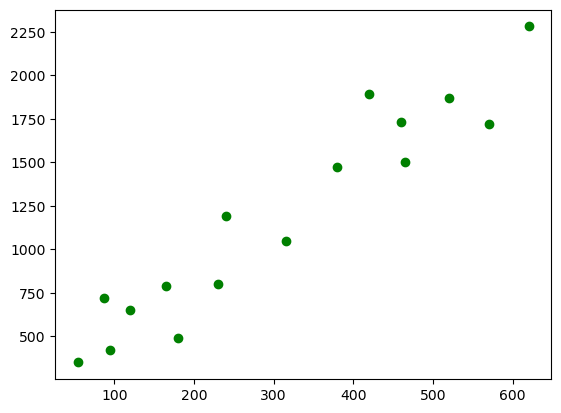

In [6]:
plt.scatter(df['Advertising_Expenditure'], df['Sales_Volume'],color='g')

In [7]:
import numpy as np
import statsmodels.api as sm

In [8]:
df_constant = sm.add_constant(df)
df_constant

,const,Year,Sales_Volume,Advertising_Expenditure,Number_of_Salespersons
0,1.0,1981,350,54,32
1,1.0,1982,420,95,47
2,1.0,1983,490,180,23
3,1.0,1984,720,87,68
4,1.0,1985,650,120,32
5,1.0,1986,800,230,17
6,1.0,1987,790,165,58
7,1.0,1988,1050,316,75
8,1.0,1989,1190,240,98
9,1.0,1990,1470,380,43


In [9]:
Adv_Exp=df_constant.iloc[:,np.r_[0:1,3:4]]
Adv_Exp

,const,Advertising_Expenditure
0,1.0,54
1,1.0,95
2,1.0,180
3,1.0,87
4,1.0,120
5,1.0,230
6,1.0,165
7,1.0,316
8,1.0,240
9,1.0,380


In [10]:
Num_Salespersons=df_constant.iloc[:,np.r_[0:1,4:5]]
Num_Salespersons

,const,Number_of_Salespersons
0,1.0,32
1,1.0,47
2,1.0,23
3,1.0,68
4,1.0,32
5,1.0,17
6,1.0,58
7,1.0,75
8,1.0,98
9,1.0,43


In [11]:
model1 = sm.OLS(df['Sales_Volume'],Adv_Exp)

In [12]:
fit1=model1.fit()

In [13]:
fitted_values1=fit1.fittedvalues

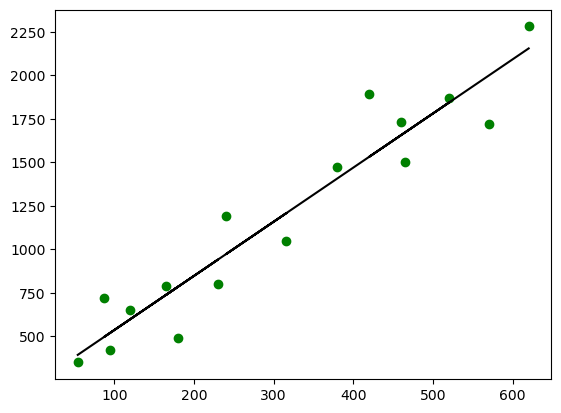

In [14]:
plt.scatter(df['Advertising_Expenditure'], df['Sales_Volume'],color='g')
plt.plot(df['Advertising_Expenditure'], fitted_values1,color='k')

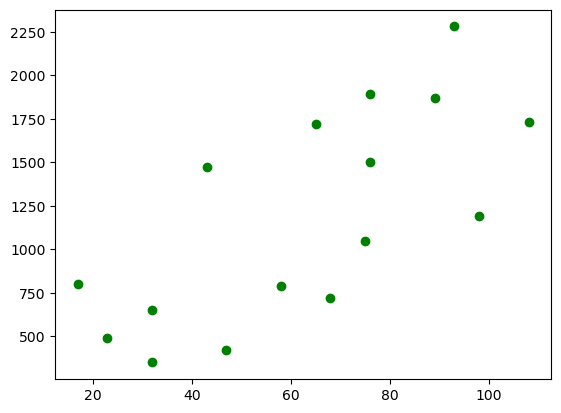

In [15]:
plt.scatter(df['Number_of_Salespersons'], df['Sales_Volume'],color='g')

In [16]:
model2 = sm.OLS(df['Sales_Volume'],Num_Salespersons)

In [17]:
fit2=model2.fit()

In [18]:
fitted_values2=fit2.fittedvalues

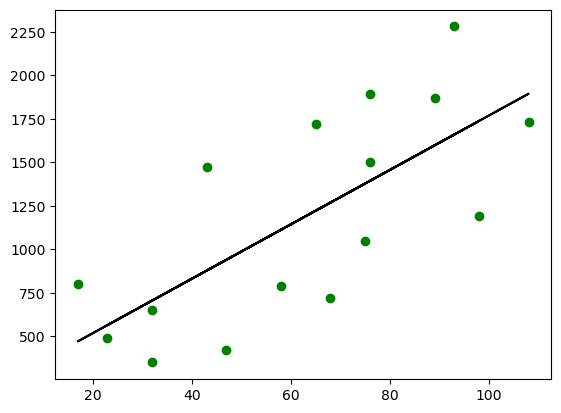

In [19]:
plt.scatter(df['Number_of_Salespersons'], df['Sales_Volume'],color='g')
plt.plot(df['Number_of_Salespersons'], fitted_values2,color='k')

In [20]:
fit1.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales_Volume   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     138.0
Date:                Thu, 09 Nov 2023   Prob (F-statistic):           1.23e-08
Time:                        18:16:51   Log-Likelihood:                -105.64
No. Observations:                  16   AIC:                             215.3
Df Residuals:                      14   BIC:                             216.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     225.7991     94.360      2.393      0.031      23.417     428.181
Advertising_Expenditure     3.1100      0.265     11.746      0.000       2.542       3.678
==============================================================================
Omnibus:                        0.152   Durbin-Watson:                   2.695
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.359
Skew:                           0.109   Prob(JB):                        0.836
Kurtosis:                       2.299   Cond. No.                         706.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
fit2.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Sales_Volume   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     14.94
Date:                Thu, 09 Nov 2023   Prob (F-statistic):            0.00171
Time:                        18:16:51   Log-Likelihood:                -118.90
No. Observations:                  16   AIC:                             241.8
Df Residuals:                      14   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    205.0927    275.400      0.745      0.469    -385.582     795.767
Number_of_Salespersons    15.6385      4.045      3.866      0.002       6.962      24.315
==============================================================================
Omnibus:                        4.456   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                1.402
Skew:                           0.148   Prob(JB):                        0.496
Kurtosis:                       1.581   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""